# Naive-Bayes Classification 

## Importing Libs & DataSet

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
df= pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

<AxesSubplot:>

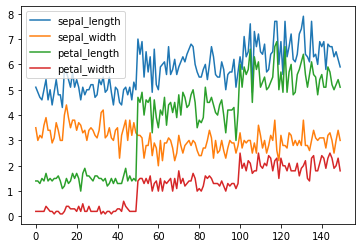

In [151]:
df.plot()

In [138]:
profile = ProfileReport(df, title='Profile Report')

In [20]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile.to_file("Profiling Report IRIS.csv")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\intwa\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:266: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation

In [139]:
if X.isnull==True:
    print('missing')
else: print('No Data element is missing/null')

No Data element is missing/null


In [5]:
target = df['species']
X = df.drop(columns='species')
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_scaled = pd.DataFrame(scaled_features)
print(df_scaled.head())

          0         1         2         3
0 -0.900681  1.032057 -1.341272 -1.312977
1 -1.143017 -0.124958 -1.341272 -1.312977
2 -1.385353  0.337848 -1.398138 -1.312977
3 -1.506521  0.106445 -1.284407 -1.312977
4 -1.021849  1.263460 -1.341272 -1.312977


### Train/Test Split

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,target, test_size = 0.30, random_state=42)

## Normality Tests

### 1. Skewness & Kurtosis Test

In [177]:
from scipy.stats import *
print(stats.kurtosis(X))
print(stats.skew(X))
list(X.columns)

[-0.57356795  0.2414433  -1.3953593  -1.33524564]
[ 0.31175306  0.33070281 -0.27171195 -0.10394367]


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### 2. Shapiro-Wilk Test

In [180]:
from scipy.stats import shapiro
for i in list(X.columns):
    stat, p = shapiro(X[i])
    print('For {}'.format(i), end=': ')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

For sepal_length: Statistics=0.976, p=0.010
Sample does not look Gaussian (reject H0)
For sepal_width: Statistics=0.984, p=0.075
Sample looks Gaussian (fail to reject H0)
For petal_length: Statistics=0.876, p=0.000
Sample does not look Gaussian (reject H0)
For petal_width: Statistics=0.903, p=0.000
Sample does not look Gaussian (reject H0)


### 3. Kolgomorov-Smirnov Test

In [182]:
from scipy.stats import kstest
for i in list(X.columns):
    stat1, p1 = kstest(X[i], 'norm')
    print('For {}'.format(i), end=': ')
    print('Statistics=%.3f, p=%.3f' % (stat1, p1))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

For sepal_length: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
For sepal_width: Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)
For petal_length: Statistics=0.877, p=0.000
Sample does not look Gaussian (reject H0)
For petal_width: Statistics=0.540, p=0.000
Sample does not look Gaussian (reject H0)


## Applying Gaussian Naive Bayes Model

In [142]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)

predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iri

## Confusion Matrix & Classification Report

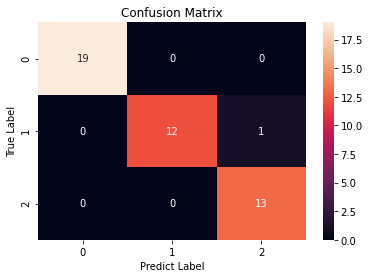

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [146]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
confusion_mat = confusion_matrix(y_test, predict_test)
sns.heatmap(confusion_mat, annot = True)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

classi_re = classification_report(y_test, predict_test)
print(classi_re)

## Prediction

In [149]:
X_new = [4.2,3.1,1.4,0.3]
prediction = model.predict([X_new])
print(prediction)

['Iris-setosa']
